In [3]:
import numpy as np
from numpy.random import normal # random normal distribution generator
from scipy.stats import norm # normal distribution function
import matplotlib.pyplot as plt

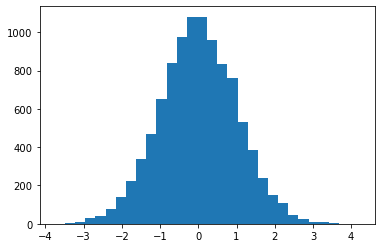

In [6]:
sample = normal(size = 10000) # generator
plt.hist(sample, bins = 30)
plt.show()

## Distribución paramétrica

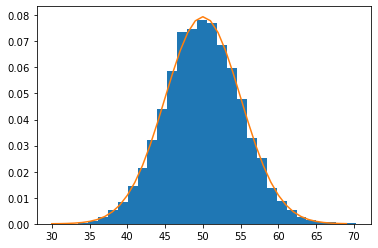

In [14]:
sample = normal(loc = 50, scale = 5, size = 10000) # loc = mu, scale = sigma
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins = 30, density = True) # density = True -> show probabilities form 0 to 1
plt.plot(values, probabilidades)
plt.show()

## Distribución no paramétrica
https://scikit-learn.org/stable/modules/density.html

In [44]:
from numpy import hstack # Juntar varios arreglos
from sklearn.neighbors import KernelDensity # Densidades

# Construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# Creamos el modelo
model = KernelDensity(bandwidth=2, kernel='gaussian') # bandwidth = es el smooth, kernel = la densidad que vamos a usar
sample = sample.reshape((len(sample), 1)) # reshape = reajusta un arreglo a las filas y columnas indicadas, en este caso muchas filas pero solo una columna

# ajuste de los datos
model.fit(sample)

KernelDensity(bandwidth=2)

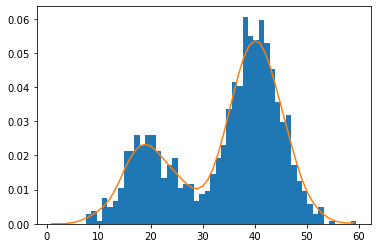

In [45]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))

probabilities = model.score_samples(values) # probabilidad logarítmica ya que es más cómodo para el computador
probabilities = np.exp(probabilities) # inversion de probabilidad para volver a las reales

plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()